In [3]:
encoded_layer = Dense(128, activation='relu')(encoded)  # Add a new hidden layer
decoded = Dense(784, activation='sigmoid')(encoded_layer)  # Update the output layer
autoencoder = Model(input_img, decoded)


Epoch 1/5
235/235 [==============================] - 3s 10ms/step - loss: 0.6944 - val_loss: 0.6942
Epoch 2/5
235/235 [==============================] - 2s 9ms/step - loss: 0.6942 - val_loss: 0.6940
Epoch 3/5
235/235 [==============================] - 2s 8ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 4/5
235/235 [==============================] - 2s 8ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 5/5
1/1 [==============================] - 0s 86ms/step


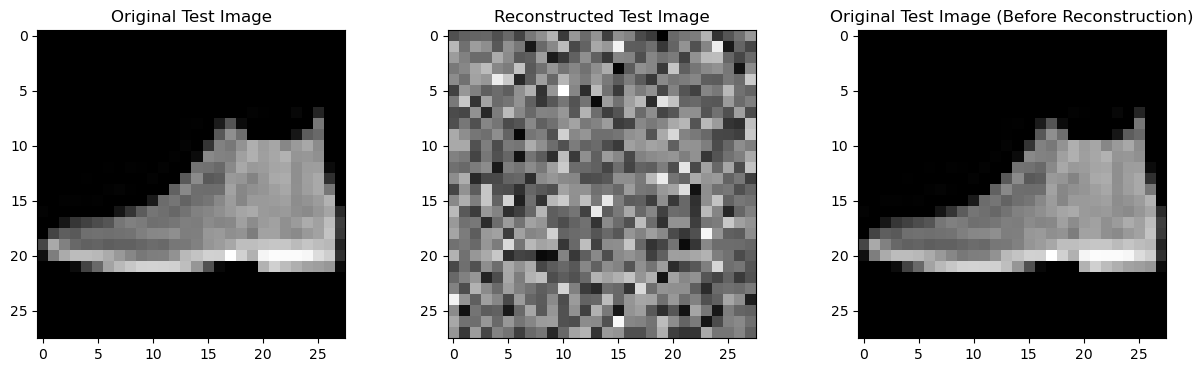

In [19]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Define the encoding dimensions
encoding_dim = 32

# Create the input placeholder
input_img = Input(shape=(784,))

# Define the encoder layers
encoded = Dense(128, activation='relu')(input_img)  # Add a new hidden layer
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Define the decoder layers
decoded = Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load and preprocess the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Make a prediction on a test sample
sample_index = 0
prediction = autoencoder.predict(np.array([x_test[sample_index]]))

# Visualize the original test data
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(x_test[sample_index].reshape(28, 28), cmap='gray')
plt.title("Original Test Image")

# Visualize the reconstructed version of the test data
plt.subplot(1, 3, 2)
plt.imshow(prediction.reshape(28, 28), cmap='gray')
plt.title("Reconstructed Test Image")

# Visualize the same test data before reconstruction
plt.subplot(1, 3, 3)
plt.imshow(x_test[sample_index].reshape(28, 28), cmap='gray')
plt.title("Original Test Image (Before Reconstruction)")

plt.show()


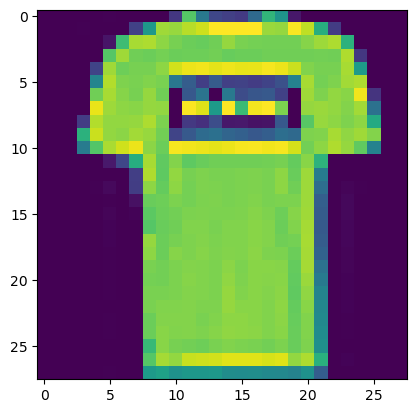

In [20]:
from matplotlib import pyplot as plt
plt.imshow(x_train[1].reshape(28,28))
plt.show()

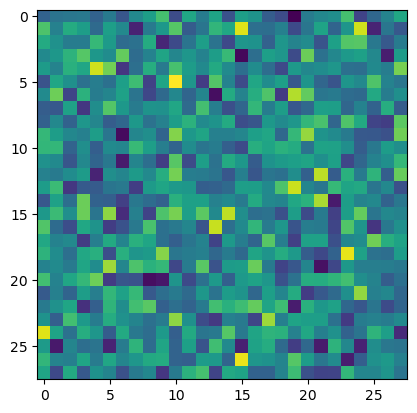

In [21]:
from matplotlib import pyplot as plt
plt.imshow(prediction.reshape(28,28))
plt.show()